# The United States Public Food Assistance Project
*Where does it come from, who spends it, who gets it.*

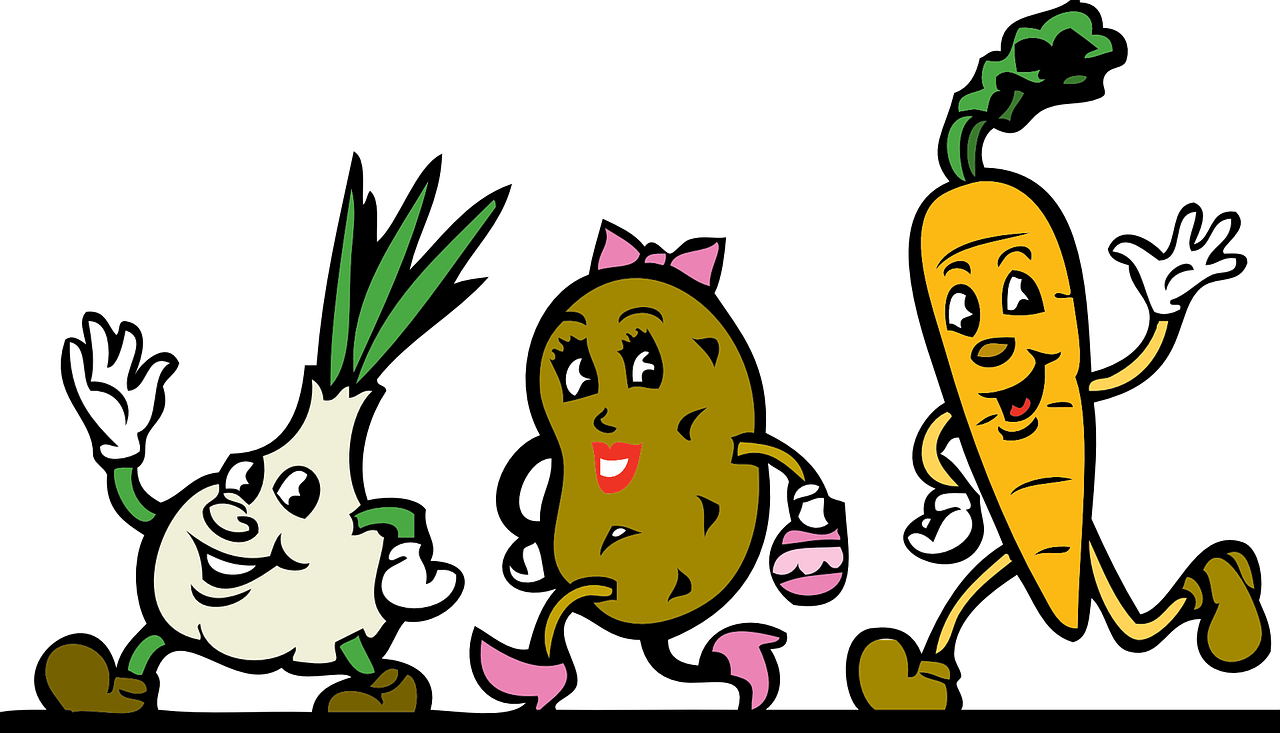

### Description

This dataset focuses on public assistance programs in the United States that provide food, namely SNAP and WIC. 

Initial coverage was for the Special Supplemental Nutrition Program for Women, Infants, and Children Program, or simply WIC. The program allocates Federal and State funds to help low-income women and children up to age five who are at nutritional risk. Funds are used to provide supplemental foods, baby formula, health care, and nutrition education.

Starting with version 5, the dataset also covers the US Supplemental Nutrition Assistance Program, more commonly known as SNAP. The program is the successor to the Food Stamps program previously in place. The program provides food assistance to low-income families in the form of a debit card. A 2016 study using POS data from SNAP-eligible vendors showed the three most purchased types of food to be meats, sweetened beverages, and vegetables.

### Content

Files may include participation data and spending for state programs, and poverty data for each state. Data for WIC covers fiscal years 2013-2016, which is actually October 2012 through September 2016. Data for SNAP covers 2015 to 2020.

In [2]:
dataset_url = 'https://www.kaggle.com/jpmiller/publicassistance'

## Setup

The next cell block imports and configure the Python libraries required to complete the analysis.

In [4]:
!pip install opendatasets --quiet

In [5]:
import opendatasets as od

In [6]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: donatusprince
Your Kaggle Key: ········


  0%|          | 0.00/703k [00:00<?, ?B/s]

100%|██████████| 703k/703k [00:02<00:00, 306kB/s]


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
print("Setup Complete")

Setup Complete


In [44]:
# Setting the deault number of row to display to 10 rows
pd.set_option('max_rows', 10)

In [45]:
# Specifying the path of the dataset CSV file to read
my_filepath = 'publicassistance/SNAP_history.csv'

In [46]:
# Fill in the line below: Read the file into a variable my_data
my_data = pd.read_csv(my_filepath, index_col='Fiscal Year')

In [47]:
# Print the first five rows of the data
my_data

,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
Fiscal Year,,,,,
1969,"2,878",6.63,228.80,21.70,250.50
1970,"4,340",10.55,549.70,27.20,576.90
1971,"9,368",13.55,"1,522.70",53.20,"1,575.90"
1972,"11,109",13.48,"1,797.30",69.40,"1,866.70"
1973,"12,166",14.60,"2,131.40",76.00,"2,207.40"
...,...,...,...,...,...
2015,"45,767",126.81,"69,645.14","4,301.03","73,946.17"
2016,"44,220",125.40,"66,539.27","4,374.28","70,913.55"
2017,"42,317",125.47,"63,711.05","4,463.67","68,174.72"


In [48]:
# viewing the data set before analysis
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1969 to 2019
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Average Participation       51 non-null     object 
 1   Average Benefit Per Person  51 non-null     float64
 2   Total Benefits(M)           51 non-null     object 
 3   Other Costs                 51 non-null     object 
 4   Total Costs(M)              51 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.4+ KB


### Cleaning  all the errors observed

In [49]:
#removing all comma from the dataset
my_data = my_data.replace(',','', regex=True)
my_data.head(5)

,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
Fiscal Year,,,,,
1969,2878,6.63,228.80,21.70,250.50
1970,4340,10.55,549.70,27.20,576.90
1971,9368,13.55,1522.70,53.20,1575.90
1972,11109,13.48,1797.30,69.40,1866.70
1973,12166,14.60,2131.40,76.00,2207.40


In [50]:
my_data.columns

Index(['Average Participation', 'Average Benefit Per Person',
       'Total Benefits(M)', 'Other Costs', 'Total Costs(M)'],
      dtype='object')

In [51]:
# Converting the data to teir appropriate data types

my_data['Average Participation'] = pd.to_numeric(my_data['Average Participation'])
my_data['Total Benefits(M)'] = pd.to_numeric(my_data['Total Benefits(M)'])
my_data['Other Costs'] = pd.to_numeric(my_data['Other Costs'])
my_data['Total Costs(M)'] = pd.to_numeric(my_data['Total Costs(M)'])

In [52]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1969 to 2019
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Average Participation       51 non-null     int64  
 1   Average Benefit Per Person  51 non-null     float64
 2   Total Benefits(M)           51 non-null     float64
 3   Other Costs                 51 non-null     float64
 4   Total Costs(M)              51 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.4+ KB


#### Creating a figure that tells a story behind the dataset.  

You can use any chart type (_line chart, bar chart, heatmap, etc_) of your choosing!

In [86]:
import plotly.express as px

In [112]:
# We'll be making visulization from 1999 - 2019 so it makes sense to create a new dataframe
df = my_data.iloc[30:]
df

,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
Fiscal Year,,,,,
1999,18183,72.27,15769.40,2051.52,17820.92
2000,17194,72.62,14983.32,2070.70,17054.02
2001,17318,74.81,15547.39,2242.00,17789.39
2002,19096,79.67,18256.20,2380.82,20637.02
2003,21250,83.94,21404.28,2412.01,23816.28
...,...,...,...,...,...
2015,45767,126.81,69645.14,4301.03,73946.17
2016,44220,125.40,66539.27,4374.28,70913.55
2017,42317,125.47,63711.05,4463.67,68174.72


In [108]:
# Create a plot
# plt.figure(figsize=(12,6))
# plt.title('US Public Food Assistance Program from 1999 - 2019')
#sns.lineplot(data=my_data.iloc[30:]);
px.line(data_frame=df, title='US Public Food Assistance Program from 1999 - 2019')

In [131]:
px.line(data_frame=df, x=df.index, y='Average Benefit Per Person', title='The US Public Food Assistance for Average Benefit Per Person from 1999 - 2019')

In [132]:
px.line(data_frame=df, x=df.index, y='Total Benefits(M)', title='The US Public Food Assistance for Total Benefits(M) from 1999 - 2019')

In [110]:
# sns.set_style('darkgrid')
# plt.figure(figsize=(12,8))
# plt.title('US Public Food Assistance Average Participation from 1999 - 2019')
# sns.barplot(x=my_data.iloc[30:].index, y=my_data.iloc[30:]['Average Participation']);

px.bar(data_frame=df, x=df.index, y='Average Participation', title='US Public Food Assistance Average Participation from 1999 - 2019')

In [111]:
px.bar(data_frame=df, x=df.index, y='Total Costs(M)', title='US Public Food Assistance Total Cost in Million from 1999 - 2019')

**Observation** - 2013 has the highest number of average participation (47,366) with the total cost of the program above 79 million, thereby making it the highest per fiscal year throughout the campaign.

In [115]:
px.bar(data_frame=df, y='Other Costs', x=df.index)

**Observation** - The miscelleanous cost for the US Public Food Assistance relatively increases each year.

In [133]:
df.head()

,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
Fiscal Year,,,,,
1999,18183,72.27,15769.40,2051.52,17820.92
2000,17194,72.62,14983.32,2070.70,17054.02
2001,17318,74.81,15547.39,2242.00,17789.39
2002,19096,79.67,18256.20,2380.82,20637.02
2003,21250,83.94,21404.28,2412.01,23816.28


In [137]:
px.scatter(df, x=df.index, y="Total Costs(M)",
           size='Average Benefit Per Person', 
           color='Other Costs',
           hover_data=['Total Benefits(M)', "Average Participation"])